# Ejemplo de Reducción de Dimensionalidad con la Base de Datos Iris

[Reducción de Dimensionalidad con la Base de Datos Iris](https://rpubs.com/dsolis/iris-pca-lda) 

### Introducción

Los métodos de reducción de dimensionalidad son técnicas del álgebra lineal que transforman el conjunto de los datos a subespacios derivados del espacio original, de menor dimensión, que permiten hacer una descripción de los datos a un menor costo. 

Estas técnicas cobran importancia ya que muchos algoritmos de diversos campos tales como análisis numérico, aprendizaje automático o minería de datos suelen degradar su rendimiento cuando se usan con datos de alta dimensionalidad. 

En los casos extemos, el algoritmo deja de ser útil para el fin que fue diseñado. 

La maldición de la dimensión (también conocida como efecto Hughes o por su término en inglés curse of dimensionality), se refiere a los diversos fenómenos que surgen al analizar y organizar datos de espacios de múltiples dimensiones.

## Objetivo de la práctica con el dataset Iris

Nuestro primer objetivo es mostrar un ejemplo práctico de una técnica conocida como PCA. 

El segundo objetivo es hacer una comparación con otra técnica conocida como LDA (Análisis discriminante Lineal). 

Nuestro tercer objetivo es comparar ambas técnicas.

Para ello vamos a utilizar la base de datos Iris, popularizada por un artículo de Fisher.

Iris es quizás la base de datos más conocida que se encuentran en la literatura de reconocimiento de patrones. El artículo de Fisher es un clásico en ésta área. 

Esta base de datos, recolectada durante varios años por Edgar Anderson fue utilizada para demostrar que estas medidas podrían utilizarse para diferenciar entre especies de plantas iris. 

Contiene 3 clases de 50 casos cada una, donde cada clase se refiere a un tipo de planta iris [Lic07].

Una clase es linealmente separable de los otras dos; 

**Dos de las clases del dataset de iris no son linealmente separables entre sí.**

## Los atributos son:

1. Longitud del sépalo en cm (Sepal.Length)
2. Ancho del sépalo en cm (Sepal.Width)
3. Longitud del pépalo en cm (Petal.Length)
4. Ancho del pépalo en cm (Pepal.Width)

## Clase (Species):

* Iris Setosa
* Iris Versicolour
* Iris Virginica

In [ ]:
from IPython.display import Image 
Image('petalo_sepalo.png',width=400,height=200) 

## Carga de datos

In [ ]:
import numpy as np 
from sklearn.datasets import load_iris
iris = load_iris() 

## Análisis exploratorio

### 1. Construcción del DataFrame

Empezamos construyendo un DataFrame con los datos `iris` 

In [ ]:
X,y = load_iris(return_X_y = True)

In [ ]:
iris_X_y = np.c_[X,y]  

In [ ]:
col = iris.feature_names

In [ ]:
col.append('Clase_iris') 

In [ ]:
col

In [ ]:
import pandas as pd 
iris_df = pd.DataFrame(iris_X_y, columns = col) 

In [ ]:
iris_df 

### 2. Resumen de las variables numéricas 

In [ ]:
iris_df.describe() 

[seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('dark_background')   

### Actividad de clase: crear un DataFrame del Dataset de florez de iris

1. cargar el dataset iris de la librería sklearn en la forma `X,y`
2. concatenar las características y las etiquetas en un solo arreglo de numpy llamado `values`
3. crear una lista de python con los nombres de las características y un nombre para la variable target `y` (`list_names`)
4. Crear el DataFrame cuyos argumentos sean el arreglo de numpy `values` y `columns = list_names`

### Aplicación de la secuencia

In [1]:
from sklearn.datasets import load_iris 
X,y = load_iris(return_X_y=True) 

In [2]:
import numpy as np 
values = np.c_[X,y] 

In [3]:
iris = load_iris() 
list_names = iris.feature_names
list_names.append('Clase')

In [4]:
import pandas as pd 
iris_df = pd.DataFrame(values,columns = list_names) 
iris_df  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clase
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Grafica de barras para variables catagóricas

Note que $y$ es una variable categórica cuyos valores son: setosa, versicolor y virgínica. 

* Para el gráfico de barras el eje horizontal será la variable categórica 
* y el vertical será para los valores máximos de cada característica para cada subcategoría. 

1. Crear las series de los valores maximos de cada característica por cada subcategoría o especie de flor.

[numpy.amax](https://numpy.org/doc/stable/reference/generated/numpy.amax.html) 

In [5]:
serie_1 = np.amax(iris_df[iris_df.Clase == 0], axis = 0) 

In [6]:
serie_1.dtype  

dtype('float64')

In [12]:
serie_1.iloc[4] = iris.target_names[int(serie_1.iloc[4])]  

In [13]:
serie_1 

sepal length (cm)       5.8
sepal width (cm)        4.4
petal length (cm)       1.9
petal width (cm)        0.6
Clase                setosa
dtype: object

In [14]:
  
serie_2 = np.amax(iris_df[iris_df.Clase == 1], axis = 0) 


In [15]:
serie_2.iloc[4] = iris.target_names[ int(serie_2[4]) ] 

In [16]:
serie_2 

sepal length (cm)             7
sepal width (cm)            3.4
petal length (cm)           5.1
petal width (cm)            1.8
Clase                versicolor
dtype: object

In [17]:
serie_3 = np.amax(iris_df[iris_df.Clase == 2], axis = 0)      

In [18]:
serie_3.iloc[4] = iris.target_names[int(serie_3[4])] 

In [19]:
serie_3 

sepal length (cm)          7.9
sepal width (cm)           3.8
petal length (cm)          6.9
petal width (cm)           2.5
Clase                virginica
dtype: object

In [20]:
iris_array_total = np.c_[np.array(serie_1), np.array(serie_2), np.array(serie_3)].T 
iris_array_total 

array([[5.8, 4.4, 1.9, 0.6, 'setosa'],
       [7.0, 3.4, 5.1, 1.8, 'versicolor'],
       [7.9, 3.8, 6.9, 2.5, 'virginica']], dtype=object)

In [21]:
iris_df_total = pd.DataFrame(iris_array_total,
                             columns = serie_1.index)   

In [22]:
iris_df_total 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clase
0,5.8,4.4,1.9,0.6,setosa
1,7,3.4,5.1,1.8,versicolor
2,7.9,3.8,6.9,2.5,virginica


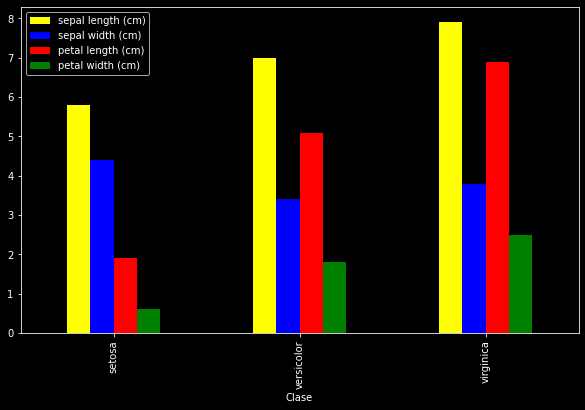

In [24]:

import matplotlib.pyplot as plt 

plt.style.use('dark_background') 

iris_df_total.plot.bar(x = 'Clase', figsize = (10,6), color = ['yellow', 'blue', 'red', 'green'])     

plt.savefig('maximos_caracteristicas.jpg') 

# Secuencia didáctica para construcción de diagrama de barras del Dataset de flores de iris

1. Crear el objeto DataFrame asociado al dataset de iris con la forma $[X|y]$.
2. Crear el arreglo de numpy de los maximos valores de las características por clase.
3. Crear la lista de clases
4. Crear un gráfico de barras con la función df.plot.bar(x = 'Clase', figsize = (), color = [])